# Data Analytics and Data Driven Decision - Final Project.

# Section 1: Description of the dataset

**Source**: [https://www.kaggle.com/jiashenliu/515k-hotel-reviews-data-in-europe](https://www.kaggle.com/jiashenliu/515k-hotel-reviews-data-in-europe)

####  Description about the contents
| **Column Name**                            	| **Data Type** 	| **Description**                                                                                                                                                	|
|--------------------------------------------	|---------------	|----------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| Hotel_Address                              	| string        	| Address of hotel.                                                                                                                                              	|
| Review_Date                                	| string        	| Date when reviewer posted the corresponding review.                                                                                                            	|
| Average_Score                              	| float         	| Average Score of the hotel, calculated based on the latest comment in the last year.                                                                           	|
| Hotel_Name                                 	| string        	| Name of Hotel.                                                                                                                                                 	|
| Reviewer_Nationality                       	| string        	| Nationality of Reviewer.                                                                                                                                       	|
| Negative_Review                            	| string        	| Negative Review the reviewer gave to the hotel. If the reviewer does not  give the negative review, then it should be: 'No Negative'.                          	|
| Review_Total_Negative_Word_Counts          	| integer       	| Total number of words in the negative review.                                                                                                                  	|
| Positive_Review                            	| string        	| Positive Review the reviewer gave to the hotel. If the reviewer does not  give the negative review, then it should be: 'No Positive'.                          	|
| Review_Total_Positive_Word_Counts          	| integer       	| Total number of words in the positive review.                                                                                                                  	|
| Reviewer_Score                             	| float         	| Score the reviewer has given to the hotel, based on his/her experience.                                                                                        	|
| Total_Number_of_Reviews_Reviewer_Has_Given 	| integer       	| Number of Reviews the reviewers has given in the past.                                                                                                         	|
| Total_Number_of_Reviews                    	| integer       	| Total number of valid reviews the hotel has.                                                                                                                   	|
| Tags                                       	| string        	| Tags reviewer gave the hotel.                                                                                                                                  	|
| days_since_review                          	| string       	| Duration between the review date and scrape date.                                                                                                              	|
| Additional_Number_of_Scoring               	| integer       	| There are also some guests who just made a scoring on the service  rather than a review. This number indicates how many valid scores  without review in there. 	|
| lat                                        	| float         	| Latitude of the hotel.                                                                                                                                         	|
| lng                                        	| float         	| Longtitude of the hotel.                                                                                                                                       	|

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

# With the following operation we set seaborn library as plotting library.
sns.set()
%matplotlib inline

FIG_SIZE = (10,8)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [36]:
# We read the csv as DataFrame.
reviews_df = pd.read_csv('Hotel_Reviews.csv')
reviews_df.head()

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                         No Negative   
2           Australia    Rooms are nice but for elderly a bit difficul...   
3      United Kingdom    My room was dirty and I was afraid to walk ba...   
4         New Zealand    You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7             2.9   
1                                           7             7.5   
2                                           9             7.1   
3                                           1             3.8   
4                                           3             6.7   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
2  [' Leisure trip ', ' Family with young childre...            3 days   
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...            3 days   
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...           10 days   

         lat       lng  
0  52.360576  4.915968  
1  52.360576  4.915968  
2  52.360576  4.915968  
3  52.360576  4.915968  
4  52.360576  4.915968

In [6]:
reviews_df.describe()

Additional_Number_of_Scoring  Average_Score  \
count                 515738.000000  515738.000000   
mean                     498.081836       8.397487   
std                      500.538467       0.548048   
min                        1.000000       5.200000   
25%                      169.000000       8.100000   
50%                      341.000000       8.400000   
75%                      660.000000       8.800000   
max                     2682.000000       9.800000   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
count                      515738.000000            515738.000000   
mean                           18.539450              2743.743944   
std                            29.690831              2317.464868   
min                             0.000000                43.000000   
25%                             2.000000              1161.000000   
50%                             9.000000              2134.000000   
75%                            23.000000              3613.000000   
max                           408.000000             16670.000000   

       Review_Total_Positive_Word_Counts  \
count                      515738.000000   
mean                           17.776458   
std                            21.804185   
min                             0.000000   
25%                             5.000000   
50%                            11.000000   
75%                            22.000000   
max                           395.000000   

       Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
count                               515738.000000   515738.000000   
mean                                     7.166001        8.395077   
std                                     11.040228        1.637856   
min                                      1.000000        2.500000   
25%                                      1.000000        7.500000   
50%                                      3.000000        8.800000   
75%                                      8.000000        9.600000   
max                                    355.000000       10.000000   

                 lat            lng  
count  512470.000000  512470.000000  
mean       49.442439       2.823803  
std         3.466325       4.579425  
min        41.328376      -0.369758  
25%        48.214662      -0.143372  
50%        51.499981       0.010607  
75%        51.516288       4.834443  
max        52.400181      16.429233

# Section 2 : Data Cleaning

In [7]:
# We count the number of element in each column to check the presence of null variable.
reviews_df.count()

Hotel_Address                                 515738
Additional_Number_of_Scoring                  515738
Review_Date                                   515738
Average_Score                                 515738
Hotel_Name                                    515738
Reviewer_Nationality                          515738
Negative_Review                               515738
Review_Total_Negative_Word_Counts             515738
Total_Number_of_Reviews                       515738
Positive_Review                               515738
Review_Total_Positive_Word_Counts             515738
Total_Number_of_Reviews_Reviewer_Has_Given    515738
Reviewer_Score                                515738
Tags                                          515738
days_since_review                             515738
lat                                           512470
lng                                           512470
dtype: int64

One of the first thing we've noticed is that some row doesn't have latitude and longitude attributes. First we check that the latitude and longitude attribute are null for each row of the dataframe that refers to this specific hotel. In this way we can be certain that we are missing the coordinates of this hotel for every review's instance (not only for a few of them).

In [8]:
reviews_df.isnull().any()

Hotel_Address                                 False
Additional_Number_of_Scoring                  False
Review_Date                                   False
Average_Score                                 False
Hotel_Name                                    False
Reviewer_Nationality                          False
Negative_Review                               False
Review_Total_Negative_Word_Counts             False
Total_Number_of_Reviews                       False
Positive_Review                               False
Review_Total_Positive_Word_Counts             False
Total_Number_of_Reviews_Reviewer_Has_Given    False
Reviewer_Score                                False
Tags                                          False
days_since_review                             False
lat                                            True
lng                                            True
dtype: bool

In [9]:
# Here we get the list of hotel names with null 'lat'.
missing_lat_hotels = reviews_df[reviews_df['lat'].isnull()]['Hotel_Name'].unique()
missing_lat_hotels

array(['Mercure Paris Gare Montparnasse', 'Holiday Inn Paris Montmartre',
       'Maison Albar Hotel Paris Op ra Diamond',
       'NH Collection Barcelona Podium', 'City Hotel Deutschmeister',
       'Hotel Park Villa', 'Fleming s Selection Hotel Wien City',
       'Cordial Theaterhotel Wien', 'Hotel Daniel Vienna', 'Roomz Vienna',
       'Renaissance Barcelona Hotel',
       'Austria Trend Hotel Schloss Wilhelminenberg Wien',
       'Hotel Advance', 'Derag Livinghotel Kaiser Franz Joseph Vienna',
       'Hotel City Central', 'Hotel Pension Baron am Schottentor',
       'Hotel Atlanta'], dtype=object)

In [10]:
# Here we check that we don't have the 'lat' for this hotel in none of the row entry associated to it.
for hotel in range(len(missing_lat_hotels)):
    assert reviews_df[reviews_df['Hotel_Name'] == missing_lat_hotels[hotel]]['lat'].isnull().all() == True

In [11]:
# Here we get the list of hotel names with null 'lng'.
missing_lng_hotels = reviews_df[reviews_df['lng'].isnull()]['Hotel_Name'].unique()
missing_lng_hotels

array(['Mercure Paris Gare Montparnasse', 'Holiday Inn Paris Montmartre',
       'Maison Albar Hotel Paris Op ra Diamond',
       'NH Collection Barcelona Podium', 'City Hotel Deutschmeister',
       'Hotel Park Villa', 'Fleming s Selection Hotel Wien City',
       'Cordial Theaterhotel Wien', 'Hotel Daniel Vienna', 'Roomz Vienna',
       'Renaissance Barcelona Hotel',
       'Austria Trend Hotel Schloss Wilhelminenberg Wien',
       'Hotel Advance', 'Derag Livinghotel Kaiser Franz Joseph Vienna',
       'Hotel City Central', 'Hotel Pension Baron am Schottentor',
       'Hotel Atlanta'], dtype=object)

In [12]:
# Here we check that we don't have the 'lng' for this hotel in none of the row entry associated to it.
for hotel in range(len(missing_lng_hotels)):
    assert reviews_df[reviews_df['Hotel_Name'] == missing_lng_hotels[hotel]]['lat'].isnull().all() == True

We fill the empty cells by searching online the geospatial coordinates associated to each one of the hotels. Then we store these information info our dataframe and we check again that now it is full with all its information.

In [13]:
missing_infos = {'Fleming s Selection Hotel Wien City': {'lat':48.209270, 'lng':16.353479},
    'Hotel City Central':{'lat':48.2136,'lng':16.3799},
    'Hotel Atlanta':{'lat':48.210033,'lng':16.363449},
    'Maison Albar Hotel Paris Op ra Diamond':{'lat':48.875343,'lng':2.323358},
    'Hotel Daniel Vienna':{'lat':48.1888,'lng':16.3840},
    'Hotel Pension Baron am Schottentor':{'lat':48.216701,'lng':16.359819},
    'Austria Trend Hotel Schloss Wilhelminenberg Wien':{'lat':48.2195,'lng':16.2856},
    'Derag Livinghotel Kaiser Franz Joseph Vienna':{'lat':48.245998,'lng':16.341080},
    'NH Collection Barcelona Podium':{'lat':41.3916,'lng':2.1779},
    'City Hotel Deutschmeister':{'lat':48.22088,'lng':16.36663},
    'Hotel Park Villa':{'lat':48.233577,'lng':16.345682},
    'Cordial Theaterhotel Wien':{'lat':48.209488,'lng':16.351585},
    'Holiday Inn Paris Montmartre':{'lat':48.888920,'lng':2.333087},
    'Roomz Vienna':{'lat':48.186605,'lng':16.420643},
    'Mercure Paris Gare Montparnasse':{'lat':48.840012,'lng':2.323595},
    'Renaissance Barcelona Hotel':{'lat':41.392673,'lng':2.167494},
    'Hotel Advance': {'lat':41.383308,'lng':2.162828}
}

In [14]:
nan_df = reviews_df[reviews_df.isnull().any(axis=1)]

for index, row in nan_df.iterrows():
    reviews_df.at[index, 'lat'] = missing_infos[row['Hotel_Name']]['lat']
    reviews_df.at[index, 'lng'] = missing_infos[row['Hotel_Name']]['lng']

In [15]:
reviews_df.count()

Hotel_Address                                 515738
Additional_Number_of_Scoring                  515738
Review_Date                                   515738
Average_Score                                 515738
Hotel_Name                                    515738
Reviewer_Nationality                          515738
Negative_Review                               515738
Review_Total_Negative_Word_Counts             515738
Total_Number_of_Reviews                       515738
Positive_Review                               515738
Review_Total_Positive_Word_Counts             515738
Total_Number_of_Reviews_Reviewer_Has_Given    515738
Reviewer_Score                                515738
Tags                                          515738
days_since_review                             515738
lat                                           515738
lng                                           515738
dtype: int64

In [16]:
reviews_df.isnull().any()

Hotel_Address                                 False
Additional_Number_of_Scoring                  False
Review_Date                                   False
Average_Score                                 False
Hotel_Name                                    False
Reviewer_Nationality                          False
Negative_Review                               False
Review_Total_Negative_Word_Counts             False
Total_Number_of_Reviews                       False
Positive_Review                               False
Review_Total_Positive_Word_Counts             False
Total_Number_of_Reviews_Reviewer_Has_Given    False
Reviewer_Score                                False
Tags                                          False
days_since_review                             False
lat                                           False
lng                                           False
dtype: bool

In order to perform some exploratory data analysis operations in the following section, we've had the need to classify the hotel based on the country in which they are located and also to classify the country either in one with sea nearby or in one without sea. We have created ad-hoc columns to represent this information for each row of the dataset.

In [17]:
# The countries are: ['Netherlands', 'Kingdom', 'France', 'Spain', 'Italy', 'Austria'].
cold_countries = ['Netherlands', 'Kingdom', 'Austria']
hot_countries = ['France', 'Italy', 'Spain']

has_sea = ['Spain', 'Kingdom', 'Netherlands']
does_not_sea = ['Italy', 'Austria', 'France' ]

In [18]:
# 'Hotel_Country' is for the name of the country in which the hotel is located.
reviews_df['Hotel_Country'] = ""

# 'Country_Type' has value equals to 1 if the hotel has sea nearby, 0 otherwise.
reviews_df['Country_Type'] = ""

for index, row in reviews_df.iterrows():
    country_name = row.Hotel_Address.split()[-1]
    reviews_df.at[index,'Hotel_Country'] = country_name
    if country_name in does_not_sea:
        reviews_df.at[index,'Country_Type'] = 0
    elif country_name in has_sea:
        reviews_df.at[index,'Country_Type'] = 1    

In [19]:
# We check that the dataset hasn't row with 'Country_Type' equals to empty string.
reviews_df[reviews_df['Country_Type'] == ""].count()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
Hotel_Country                                 0
Country_Type                                  0
dtype: int64

In [20]:
reviews_df.head(5)

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                         No Negative   
2           Australia    Rooms are nice but for elderly a bit difficul...   
3      United Kingdom    My room was dirty and I was afraid to walk ba...   
4         New Zealand    You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7             2.9   
1                                           7             7.5   
2                                           9             7.1   
3                                           1             3.8   
4                                           3             6.7   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
2  [' Leisure trip ', ' Family with young childre...            3 days   
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...            3 days   
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...           10 days   

         lat       lng Hotel_Country Country_Type  
0  52.360576  4.915968   Netherlands            1  
1  52.360576  4.915968   Netherlands            1  
2  52.360576  4.915968   Netherlands            1  
3  52.360576  4.915968   Netherlands            1  
4  52.360576  4.915968   Netherlands            1

The *'Review_Date'* column has date in string format, we have transformed them in DateTime object so that we can better manipulate them.

In [21]:
# Convert date type from string to datetime.
reviews_df['Review_Date'] = pd.to_datetime(reviews_df['Review_Date'], format='%m/%d/%Y')

The *'days_since_review'* column has the information is string format with an additional string "days" that for us is useless (for example "10 days"). In the following cell we extract the number from the string and update the value of the cell.

In [22]:
# Delete "days" word from 'days_since_review' column.
cleaned_days = reviews_df['days_since_review'].str.extract('(\d+)').astype('int32')
reviews_df['days_since_review'] = cleaned_days

The *'Reviewer_Nationality'* columns has one whitespace at the beginning and one at the end of the value. We have removed them.

In [23]:
# Remove white spaces at the beginning and end of reviewer nationality fields.
cleaned_nat = [str(row).strip() for row in reviews_df['Reviewer_Nationality']]
reviews_df['Reviewer_Nationality'] = cleaned_nat

Now that the dataset has been cleaned, we can save it so that next time we load the new formatted version.

In [24]:
reviews_df.to_csv('Cleaned_Hotel_Reviews.csv', index=False)

In [25]:
# reviews_df = pd.read_csv('Cleaned_Hotel_Reviews.csv',index_col=[0])
# reviews_df.index.name = 'Index'

In [26]:
dataframe_length = reviews_df['Hotel_Name'].count()
reviews_df.head()

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194  2017-08-03            7.7  Hotel Arena   
1                           194  2017-08-03            7.7  Hotel Arena   
2                           194  2017-07-31            7.7  Hotel Arena   
3                           194  2017-07-31            7.7  Hotel Arena   
4                           194  2017-07-24            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0               Russia   I am so angry that i made this post available...   
1              Ireland                                        No Negative   
2            Australia   Rooms are nice but for elderly a bit difficul...   
3       United Kingdom   My room was dirty and I was afraid to walk ba...   
4          New Zealand   You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7             2.9   
1                                           7             7.5   
2                                           9             7.1   
3                                           1             3.8   
4                                           3             6.7   

                                                Tags  days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...                  0   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...                  0   
2  [' Leisure trip ', ' Family with young childre...                  3   
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...                  3   
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...                 10   

         lat       lng Hotel_Country Country_Type  
0  52.360576  4.915968   Netherlands            1  
1  52.360576  4.915968   Netherlands            1  
2  52.360576  4.915968   Netherlands            1  
3  52.360576  4.915968   Netherlands            1  
4  52.360576  4.915968   Netherlands            1

# Section 3: Exploratory Analysis
In this section we explore our data, we've organized our exploration as Question/Answer where the question is given in a non-technical way and the answer is obtained by investigating our dataset.

#### Question: How many hotels do we have in the dataset? 
#### Question: What is the hotel with most reviews?

In [27]:
reviews_df['Hotel_Name'].describe()

count                                         515738
unique                                          1492
top       Britannia International Hotel Canary Wharf
freq                                            4789
Name: Hotel_Name, dtype: object

We have 1492 different hotels in the dataset and the most frequent one (i.e. the one for which we have the major number of reviews) is the **Britannia International Hotel Canary Wharf** with 4789 reviews.

#### Question:  How many reviews do we have for each one of the reviewed hotels? 

In [28]:
# with .value_counts() we count the number of occurencies for each one of the used values.
reviews_df['Hotel_Name'].value_counts().head(20)

Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3578
DoubleTree by Hilton Hotel London Tower of London    3212
Grand Royale London Hyde Park                        2958
Holiday Inn London Kensington                        2768
Hilton London Metropole                              2628
Millennium Gloucester Hotel London                   2565
Intercontinental London The O2                       2551
Park Grand Paddington Court                          2288
Hilton London Wembley                                2227
Park Plaza County Hall London                        2223
Blakemore Hyde Park                                  2178
Park Plaza London Riverbank                          2167
M by Montcalm Shoreditch London Tech City            2155
DoubleTree by Hilton London Docklands Riverside      2147
St James Court

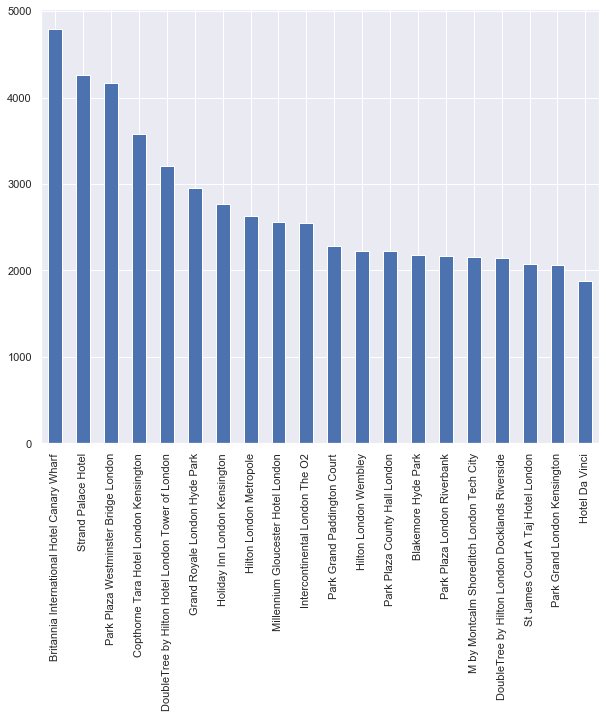

In [29]:
reviews_df['Hotel_Name'].value_counts().head(20).plot(kind='bar',figsize=FIG_SIZE)

#### Question: What is the time range of these reviews? 

In [30]:
reviews_df['Review_Date'].min().strftime('%m-%d-%Y')

'08-04-2015'

In [31]:
reviews_df['Review_Date'].max().strftime('%m-%d-%Y')

'08-03-2017'

#### Question: Which are the most frequent days for reviewers?

In [32]:
reviews_df['Review_Date'].value_counts().head(10)

2017-08-02    2585
2016-09-15    2308
2017-04-05    2284
2016-08-30    1963
2016-02-16    1940
2016-07-05    1904
2016-05-31    1860
2016-12-05    1803
2016-07-12    1801
2016-08-02    1783
Name: Review_Date, dtype: int64

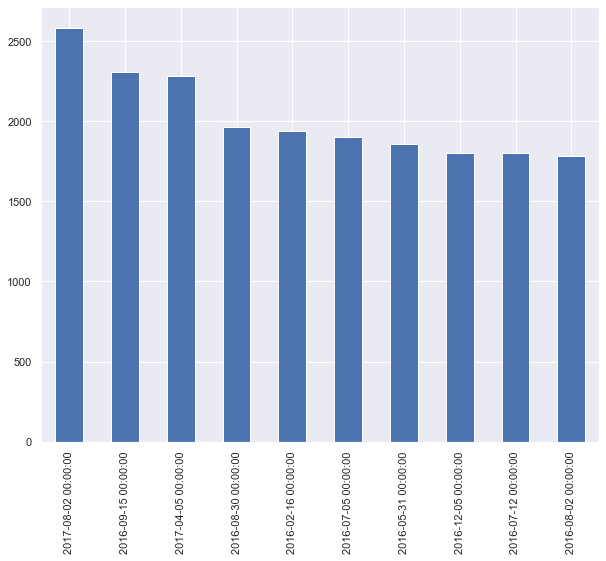

In [33]:
reviews_df['Review_Date'].value_counts().head(10).plot(kind='bar', figsize=FIG_SIZE)

#### Question: How is the number of reviews spread across time?

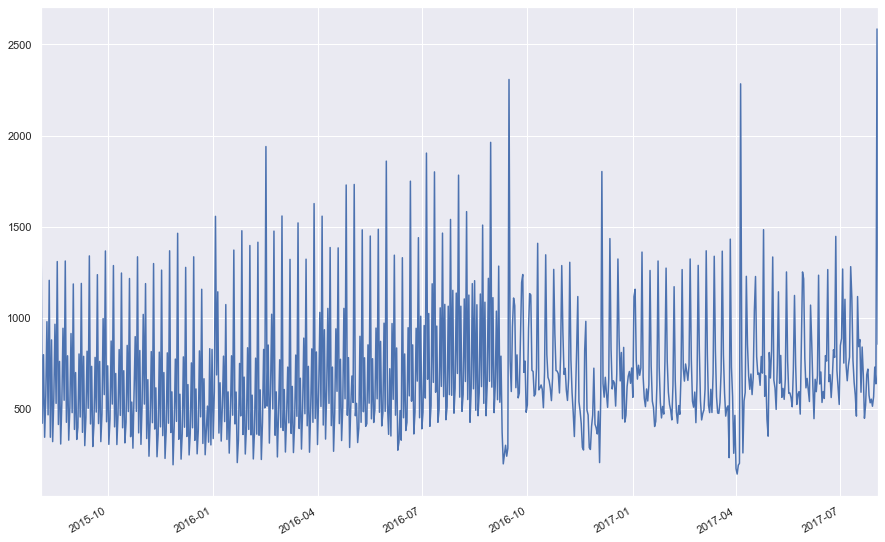

In [34]:
reviews_df['Review_Date'].value_counts().plot(figsize=(15,10))

#### Question: What is the date in which the data has been scraped?

In [35]:
reviews_df.query('days_since_review == 0').iloc[0]['Review_Date'].strftime('%m-%d-%Y')

'08-03-2017'

#### Question: How are the average scores distributed?

In [36]:
reviews_df['Average_Score'].describe()

count    515738.000000
mean          8.397487
std           0.548048
min           5.200000
25%           8.100000
50%           8.400000
75%           8.800000
max           9.800000
Name: Average_Score, dtype: float64

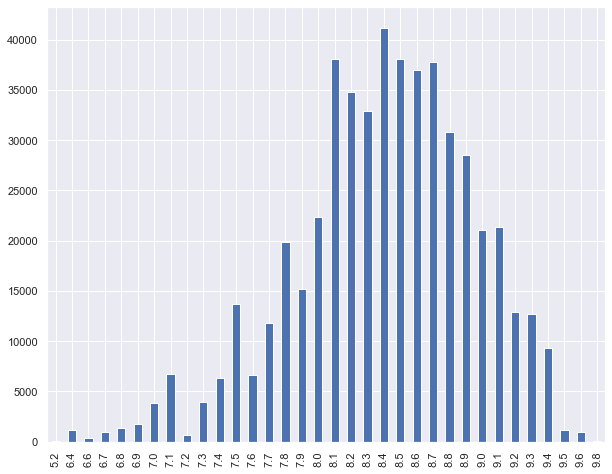

In [37]:
reviews_df['Average_Score'].value_counts().sort_index().plot(kind='bar',figsize=FIG_SIZE)

We see that most of the hotels' reviewer scores lie between an average score of 8.0 and 9.0.

In [38]:
# We count how many reviews are in the range [8.0,9.0].
t = reviews_df['Average_Score'].value_counts().sort_index()[8.0 : 9.0].sum()
t

362629

In [39]:
percentage = t / reviews_df['Average_Score'].count() * 100
print("In this range of score fall the {:.2f}% of the reviews.".format(percentage))

In this range of score fall the 70.31% of the reviews.


#### Question: How is the nationality of the reviewers distribitued?

In [40]:
reviews_df['Reviewer_Nationality'].value_counts().head(10)

United Kingdom              245246
United States of America     35437
Australia                    21686
Ireland                      14827
United Arab Emirates         10235
Saudi Arabia                  8951
Netherlands                   8772
Switzerland                   8678
Germany                       7941
Canada                        7894
Name: Reviewer_Nationality, dtype: int64

We've noticed that a lot of the reviews are from United Kingdom people.

In [41]:
reviews_df['Reviewer_Nationality'].value_counts().iloc[0] / dataframe_length * 100

47.55243941691324

#### Question: How many reviews are from italian people?

In [42]:
reviews_df['Reviewer_Nationality'].value_counts()['Italy']

6114

#### Question: How is the number of reviews made by the reviewers distributed?

In [43]:
reviews_df['Total_Number_of_Reviews_Reviewer_Has_Given'].value_counts().head(10)

1     154640
2      67077
3      46845
4      35026
5      27629
6      22621
7      18614
8      16150
9      13545
10     11717
Name: Total_Number_of_Reviews_Reviewer_Has_Given, dtype: int64

We see that there are 154640 reviews given by people that have given only 1 review, this means that it's their first one.

In [44]:
percentage = reviews_df['Total_Number_of_Reviews_Reviewer_Has_Given'].value_counts().iloc[0]
print("The percentage of first review in the dataframe is {:.2f}%".format(percentage / dataframe_length * 100))

The percentage of first review in the dataframe is 29.98%


#### Question: Where are the reviewed hotels located?

In [45]:
reviews_df['Hotel_Country'].describe()

count      515738
unique          6
top       Kingdom
freq       262301
Name: Hotel_Country, dtype: object

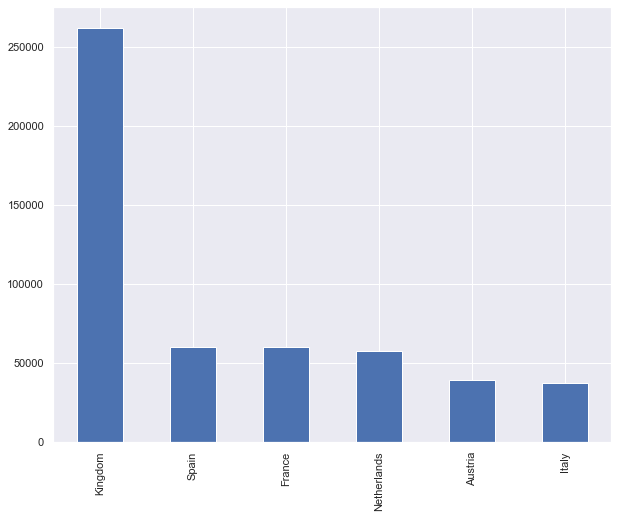

In [46]:
reviews_df['Hotel_Country'].value_counts().head(10).plot(kind='bar', figsize=FIG_SIZE)

#### Question: Can we infer something from the location of the hotels and the period in which the reviews were made? For example does the amount of reviews during summer for sea-side hotels increase?

In [47]:
reviews_df['count'] = 0
df = reviews_df['count'].groupby([reviews_df['Country_Type'],reviews_df['Review_Date'].dt.strftime('%m'),reviews_df['Review_Date'].dt.strftime('%Y')]).count()

In [48]:
df.head()

Country_Type  Review_Date  Review_Date
0             01           2016           4737
                           2017           5440
              02           2016           3989
                           2017           4231
              03           2016           4712
Name: count, dtype: int64

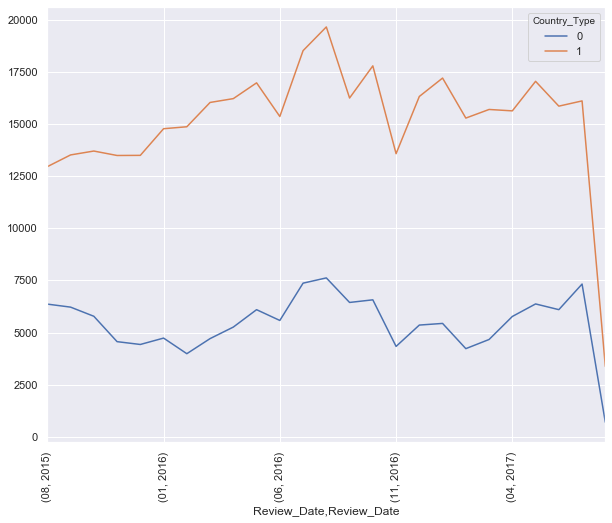

In [49]:
df.unstack(level=0).sort_index(level=[1,0]).plot(figsize=FIG_SIZE, rot=90)

We can't infer much from this plot because the red line (the one that contains the reviews for UK hotels) has much more reviews with respect to the other. So in the following cell we work only on the subset of reviews that are related to all the other hotels, except to those in UK.

In [50]:
# We remove all reviews from UK.
no_uk = reviews_df.query('Hotel_Country != "Kingdom"')
no_uk['count'] = ""
df = no_uk['count'].groupby([no_uk['Country_Type'],no_uk['Review_Date'].dt.strftime('%m'),no_uk['Review_Date'].dt.strftime('%Y')]).count()
df.head()

C:\Users\Casa\Anaconda3\envs\ddd\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Country_Type  Review_Date  Review_Date
0             01           2016           4737
                           2017           5440
              02           2016           3989
                           2017           4231
              03           2016           4712
Name: count, dtype: int64

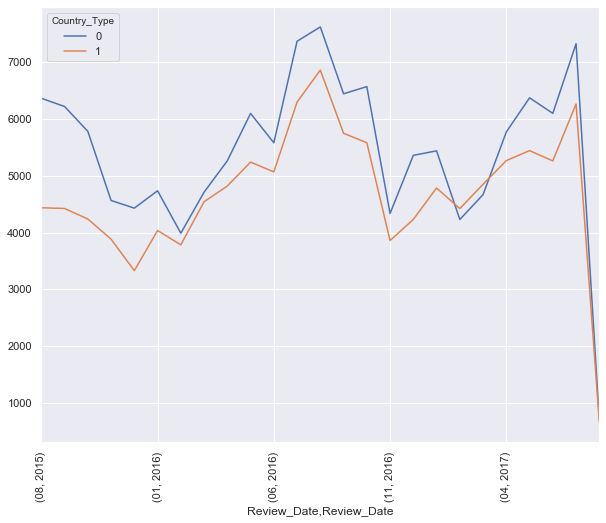

In [51]:
df.unstack(level=0).sort_index(level=[1,0]).plot(figsize=FIG_SIZE, rot=90)
# Country type = 1 means the hotel is near sea.

We thought that during summer periods, the number of reviews left to hotel near the sea would have been bigger that the ones left to those hotels located in countries without seaside. But, as stated by the previous plot, this is not true.

#### Question: Which are the most used tags in the reviews?

In [53]:
# 'Tag' column has an array formatted as string, so we've used Regex to fetch the contents.
tag = pd.Series(re.findall(r'[\']\s([\w\s]+)\s[\']',''.join(reviews_df.Tags))).value_counts()
tag.head()

Leisure trip                      417778
Submitted from a mobile device    307640
Couple                            252294
Stayed 1 night                    193645
Stayed 2 nights                   133937
dtype: int64

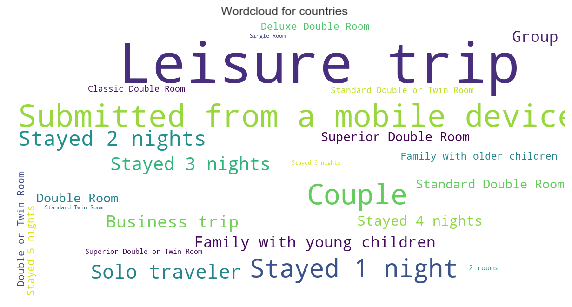

In [54]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', scale=3, max_font_size=40, max_words=25).generate_from_frequencies(tag)
wordcloud.recolor(random_state=1)
plt.figure(1, figsize=FIG_SIZE)
plt.imshow(wordcloud)
plt.title("Wordcloud for countries ")
plt.axis("off")
plt.show()

As we can see, most of the reviews are related to leisure trip which is the biggest word in the wordcloud. 'Couple' is bigger that 'Solo traveler' this means that there are more trip done in 2 with respect to the ones done alone.
Interestingly the tag 'Submitted from a mobile devide' is big, in the next quesiton we'll get the number and percentage of reviews submitted by smartphone. This is important expecially for booking sites, to encourgae them to have a nice and user-friendly app. Other thing to notice is that the longer the trip is, the smaller the tag 'Stayed x night' is.

#### Question: How many reviews were posted by smartphone application?

In [55]:
tag['Submitted from a mobile device']

307640

In [56]:
print("The {:.2f}% of the total number.".format(tag['Submitted from a mobile device'] / dataframe_length * 100))

The 59.65% of the total number.


#### Question: Where are the hotels located?

In [57]:
choords = reviews_df.drop_duplicates(subset=['Hotel_Name'])

In [58]:
import folium as f
from folium.plugins import MarkerCluster

m = f.Map(location=[choords['lat'].mean(), choords['lng'].mean()], zoom_start=5)

In [59]:
mc = MarkerCluster()

for index, row in choords.iterrows():
    mc.add_child(f.Marker(location=[row["lat"], row["lng"]],popup='<i>{}</i>'.format(row['Hotel_Name'])))

m.add_child(mc)
m

#### Question: How many positive reviews there are in dataset?


#### Answer: 
In order to answer this question we need to use the data contained in the column **Review_Total_Positive_Word_Counts**, when the value is equals to *zero* it means this is **not** a positive review.

In [60]:
reviews_df['Review_Total_Positive_Word_Counts'].value_counts().head()

0    35946
6    26921
5    26844
4    24656
7    24538
Name: Review_Total_Positive_Word_Counts, dtype: int64

We have 35946 reviews with positive words count equal to zero, this means that they are **completely negative** reviews.

In [61]:
df = reviews_df.query('Review_Total_Positive_Word_Counts == 0')[['Negative_Review', 'Positive_Review']]
df.head()

Negative_Review Positive_Review
8     Even though the pictures show very clean room...     No Positive
32    Our bathroom had an urine order Shower was ve...     No Positive
98    Got charged 50 for a birthday package when it...     No Positive
121   The first room had steep steps to a loft bed ...     No Positive
134   Foyer was a mess Only place to relax was the ...     No Positive

So, in order to find the number of positive reviews we need to compute the number of rows with **Review_Total_Negative_Word_Counts** equals to zero.

In [62]:
reviews_df['Review_Total_Negative_Word_Counts'].value_counts().head()

0    127890
2     24647
3     18144
6     17749
5     16809
Name: Review_Total_Negative_Word_Counts, dtype: int64

Their number is 127890 but at this point we've found a problem. If we have 127890 positive reviews and 35946 negative in total we should have 127890 + 35946 = 163836 reviews but we know that our dataset has much more rows (515738). Clearly not all the reviews in the dataset have either the *'Negative_Review'* or the *'Positive_Review'* empty, but the fact that only 163836 out of 515738 have is strange.
In the following cells we try to investigate this problem.

In [63]:
reviews_df.query('Review_Total_Negative_Word_Counts == 1')[['Negative_Review', 'Review_Total_Negative_Word_Counts']]

Empty DataFrame
Columns: [Negative_Review, Review_Total_Negative_Word_Counts]
Index: []

There are no rows with only 1 word in it.

In [64]:
reviews_df.query('Review_Total_Negative_Word_Counts == 2').head()[['Negative_Review', 'Review_Total_Negative_Word_Counts']]

Negative_Review  Review_Total_Negative_Word_Counts
288         Nothing                                  2
308    Construction                                  2
530         Nothing                                  2
574         Nothing                                  2
606         nothing                                  2

This is the first problem that we've found, there are reviews with **Negative_Review** = "Nothing" or "nothing" that should be classified as positive but, given the fact that they have **Review_Total_Negative_Word_Counts** == 2 they are not. Another fact that arises is that we have count of words equal to 2 but the word is only one ("nothing" or "Nothing"). This probably means that there are whitespaces counted as word.

In [65]:
reviews_df.query('Review_Total_Negative_Word_Counts == 3').head()[['Negative_Review', 'Review_Total_Negative_Word_Counts']]

Negative_Review  Review_Total_Negative_Word_Counts
24             Nothing                                   3
228                 n a                                  3
263   Loud aircondition                                  3
268            Nothing                                   3
283            Nothing                                   3

Also when the count is 3 we have the problem described above. We have also the "n a" negative review that should be classified in a positive review.

In [66]:
reviews_df.query('Review_Total_Negative_Word_Counts == 4').head()[['Negative_Review', 'Review_Total_Negative_Word_Counts']]

Negative_Review  Review_Total_Negative_Word_Counts
33         Please see above                                  4
231      No bad experiences                                  4
258     Unusual room layout                                  4
291         Breakfast poor                                   4
326   Service in reataurant                                  4

"No bad experiences" is another keyword that we should use for classifying the reviews.

In [67]:
reviews_df.query('Review_Total_Negative_Word_Counts == 5').head()[['Negative_Review', 'Review_Total_Negative_Word_Counts']]

Negative_Review  Review_Total_Negative_Word_Counts
10         Nothing all great                                   5
52        I loved everything                                   5
272         check in time 3pm                                  5
293    Nothing it was perfect                                  5
295   Hotel under renovation                                   5

"Nothing all great" and "Nothing it was perfect" are other sentences that sould be used for classifying the reviews. The creatore of dateset supposed that when *'Review_Total_Negative_Word_Counts'* was equals to zero, the review was positive. But, as we've showed, this is not true because there are different rows with inconsistent data, suck as "nothing", "Nothing", "n a", all of them could be found in the dataset with whitespace/s.
From this problem we can deduce that we can't used the word count for computing neither the *completely* negative nor the *completely* positive.

In [68]:
# We've removed the whitespaces in the fields 'Negative_Review' and 'Positive_Review'.
reviews_df['Negative_Review'] = [x.lower().strip() for x in reviews_df['Negative_Review']]
reviews_df['Positive_Review'] = [x.lower().strip() for x in reviews_df['Positive_Review']]

reviews_df[['Negative_Review','Positive_Review']].head()

Negative_Review  \
0  i am so angry that i made this post available ...   
1                                        no negative   
2  rooms are nice but for elderly a bit difficult...   
3  my room was dirty and i was afraid to walk bar...   
4  you when i booked with your company on line yo...   

                                     Positive_Review  
0   only the park outside of the hotel was beautiful  
1  no real complaints the hotel was great great l...  
2  location was good and staff were ok it is cute...  
3  great location in nice surroundings the bar an...  
4     amazing location and building romantic setting

Given the previously mentioned problems, we've decided to classify the reviews in positive and negative ones by using the **Reviewer_Score** field availabled for each review. This score has a value between 0 (really bad) and 10 (really good), we set the boundaries of the bad reviews for the interval \[0 ,5\] and for the good ones to (5,10]. 

In [69]:
reviews_df.query('Reviewer_Score <= 5').head()[['Negative_Review', 'Positive_Review']]

Negative_Review  \
0   i am so angry that i made this post available ...   
3   my room was dirty and i was afraid to walk bar...   
6   cleaner did not change our sheet and duvet eve...   
12  the floor in my room was filfy dirty very basi...   
21  our room was an overrated disaster room 231 di...   

                                      Positive_Review  
0    only the park outside of the hotel was beautiful  
3   great location in nice surroundings the bar an...  
6   the room is spacious and bright the hotel is l...  
12                            comfy bed good location  
21  the breakfast was the only positive element of...

In [70]:
# We create 2 columns for the 'classification'.
reviews_df['Is_Positive'] = 0
reviews_df['Is_Negative'] = 0

reviews_df['Is_Positive'] =  reviews_df['Reviewer_Score'].apply(lambda value: 1 if value>5 else 0)
reviews_df['Is_Negative'] =  reviews_df['Reviewer_Score'].apply(lambda value: 1 if value<=5 else 0)

reviews_df.head()[['Positive_Review','Negative_Review','Is_Positive','Is_Negative','Reviewer_Score']]

Positive_Review  \
0   only the park outside of the hotel was beautiful   
1  no real complaints the hotel was great great l...   
2  location was good and staff were ok it is cute...   
3  great location in nice surroundings the bar an...   
4     amazing location and building romantic setting   

                                     Negative_Review  Is_Positive  \
0  i am so angry that i made this post available ...            0   
1                                        no negative            1   
2  rooms are nice but for elderly a bit difficult...            1   
3  my room was dirty and i was afraid to walk bar...            0   
4  you when i booked with your company on line yo...            1   

   Is_Negative  Reviewer_Score  
0            1             2.9  
1            0             7.5  
2            0             7.1  
3            1             3.8  
4            0             6.7

In [71]:
# We check that each row has been classified.
dataframe_length == reviews_df['Is_Positive'].sum() + reviews_df['Is_Negative'].sum()

True

#### Question: Which is the hotel with the most number of negative reviews?

In [72]:
df = reviews_df.groupby(['Hotel_Name'])['Is_Positive','Is_Negative'].sum()
df.sort_values(by=['Is_Negative'],ascending=False).head()

Is_Positive  Is_Negative
Hotel_Name                                                          
Britannia International Hotel Canary Wharf         3668         1121
Hilton London Metropole                            2170          458
Grand Royale London Hyde Park                      2587          371
Bloomsbury Palace Hotel                             971          302
Millennium Gloucester Hotel London                 2268          297

#### Question: How are positive and negative reviews distributed among hotels?

In [73]:
df['Sum'] = df.sum(axis=1,numeric_only=True)
df = df.sort_values(by='Sum',ascending=False)
df.drop('Sum',inplace=True,axis=1)

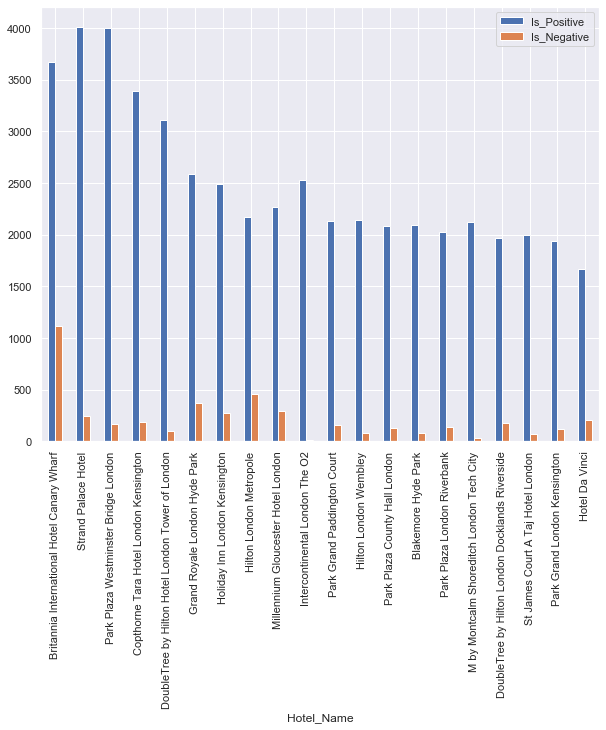

In [74]:
df.head(20).plot(kind='bar',figsize=FIG_SIZE)

#### Question: How is the reviewer score affected by the nationality of the reviewer?

In [75]:
reviews_df.query('Hotel_Name == "Britannia International Hotel Canary Wharf" and Reviewer_Nationality=="Zambia"')['Reviewer_Score']

65817    2.9
Name: Reviewer_Score, dtype: float64

In [76]:
df = reviews_df.query('Hotel_Name == "Britannia International Hotel Canary Wharf"')
df = df.groupby(by='Reviewer_Nationality')['Reviewer_Score'].agg(["count", "mean"])
df.head()

count  mean
Reviewer_Nationality             
                          3   6.8
Albania                   2   8.1
Algeria                   1   3.3
Andorra                   1   9.6
Argentina                 2   7.3

In [77]:
df = df.sort_values(by='mean', ascending=False).query('count>=20')
df.head()

count      mean
Reviewer_Nationality                 
United Kingdom         3833  6.969736
Italy                    44  6.793182
Ireland                 116  6.695690
Spain                    31  6.500000
Belgium                  27  6.340741

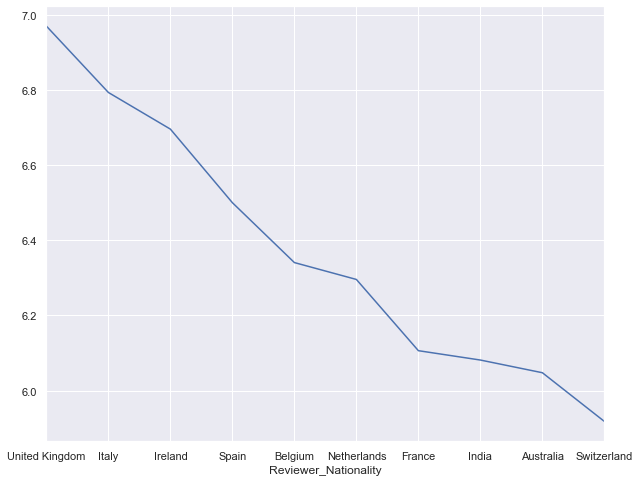

In [78]:
df = df.head(10)
df['mean'].plot(figsize=FIG_SIZE)

#### Question: Which are the most used for positive reviews? And for negative?

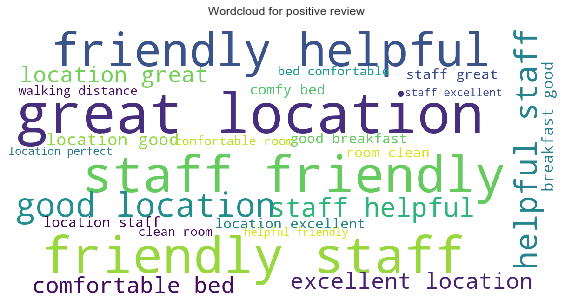

In [79]:
wordcloud = WordCloud(background_color='white', scale=3, max_font_size=40, max_words=25).generate_from_text(' '.join(list(reviews_df['Positive_Review'])))
wordcloud.recolor(random_state=1)
plt.figure(1, figsize=FIG_SIZE)
plt.imshow(wordcloud)
plt.title("Wordcloud for positive review")
plt.axis("off")
plt.show()

In [ ]:
wordcloud = WordCloud(background_color='white', scale=3, max_font_size=40, max_words=25).generate_from_text(' '.join(list(reviews_df['Negative_Review'])))
wordcloud.recolor(random_state=1)
plt.figure(1, figsize=FIG_SIZE)
plt.imshow(wordcloud)
plt.title("Wordcloud for negative review")
plt.axis("off")
plt.show()

# Section 4: NLP

In this section we focus our attention on the text field present in the dataset, in particular on the columns *'Positive_Review'* and *'Negative_Review'*. Given the fact that they are text fieds we have to apply some Natural Language Processing methods, like Bag-of-Word, TF-IDF and Word2Vec.

* **Bag-of-Words** is a way of extracting features from text, it is a very simple approach, and can be used in a myriad of ways for extracting features from documents. A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things: a vocabulary of known words and a measure of the presence of known words (such as frequency per document).
* **TF-IDF** short for *term frequency–inverse document frequency*, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word. The tf–idf is the product of two statistics, term frequency and inverse document frequency.
* **Word2Vec** is a method used to produce *Word Embeddings* (where words from text are represented by using vectors of real numbers). It is based on a two-layer neural network that is trained to reconstruct linguistic contexts of words. Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import string

from nltk.corpus import wordnet    
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/luigi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

The first thing we do is create a new pandas Dataframe composed of two columns, one is *'Text'* that is made by the concatenation of both the *'Positive_Review'* and *'Negative_Review'* fields, and the other is *'Is_Positive'*.

In [86]:
reviews_df['Text'] = reviews_df['Positive_Review'] + " " + reviews_df['Negative_Review']
text_df = reviews_df[['Text','Is_Positive']].copy()
text_df.head()

Text  Is_Positive
0  only the park outside of the hotel was beautif...            0
1  no real complaints the hotel was great great l...            1
2  location was good and staff were ok it is cute...            1
3  great location in nice surroundings the bar an...            0
4  amazing location and building romantic setting...            1

The text of the column *'Text'* has to be cleaned, we need to remove puncutation, number and most important the **stopwords** in the sentences. Then we lemmatize each word, meaning that we extract form a word it's meaning. We store the result of this operation in a new column called *'Clean_Text'*.

In [87]:
# Clean the sentences, this operation is slow and cpu-intensive.

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
stop = set(stopwords.words('english'))

def clean_text(text):
    # lower text
    text = text.lower()
    
    # tokenize text and remove puncutation.
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
    # remove words that contain numbers.
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    # remove stop words.
    text = [x for x in text if x not in stop]
    
    # remove empty tokens.
    text = [t for t in text if len(t) > 0]
    
    # pos tag text.
    pos_tags = pos_tag(text)
    
    # lemmatize text.
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    
    # remove words with only one letter.
    text = [t for t in text if len(t) > 1]
    
    # join all.
    text = " ".join(text)
    return(text)

# text_df['Clean_Text'] = text_df['Text'].apply(clean_text)
# text_df.to_csv('Cleaned_Text.csv', index=False)

In [4]:
text_df = pd.read_csv('Cleaned_Text.csv')
text_df.head()

Text  Is_Positive  \
0  only the park outside of the hotel was beautif...            0   
1  no real complaints the hotel was great great l...            1   
2  location was good and staff were ok it is cute...            1   
3  great location in nice surroundings the bar an...            0   
4  amazing location and building romantic setting...            1   

                                          Clean_Text  
0  park outside hotel beautiful angry make post a...  
1  real complaint hotel great great location surr...  
2  location good staff ok cute hotel breakfast ra...  
3  great location nice surroundings bar restauran...  
4  amaze location building romantic setting book ...

We check of empty cells because maybe in the cleaning phase some words were removed and the cell is now empty.

In [5]:
text_df.isna().any()

Text           False
Is_Positive    False
Clean_Text      True
dtype: bool

In [6]:
text_df[text_df['Clean_Text'].isna()].head()

Text  Is_Positive Clean_Text
10884                     1        NaN
12798                     1        NaN
16784                     1        NaN
18387                     1        NaN
19708  n a n a            1        NaN

We simply fill the null cell with empty space.

In [7]:
text_df['Clean_Text'] = text_df['Clean_Text'].fillna(value=" ")

In [8]:
text_df.isna().any()

Text           False
Is_Positive    False
Clean_Text     False
dtype: bool

Now we can apply our NLP methods.

## Bag-of-Words

In [38]:
vec_bow = CountVectorizer(analyzer='word', ngram_range=(1, 1), max_df=1.0, 
                             min_df=0, max_features=None)
X_train_counts_bow = vec_bow.fit_transform(text_df['Clean_Text'])

In [39]:
print(X_train_counts_bow.shape)

(515738, 70573)


In [40]:
vec_bow = CountVectorizer(analyzer='word', ngram_range=(1, 1), max_df=1.0, 
                             min_df=10, max_features=None)

In [41]:
X_train_counts_bow = vec_bow.fit_transform(text_df['Clean_Text'])

In [42]:
print(X_train_counts_bow.shape)

(515738, 11716)


We have created a bag-of-words with a minimum number of term frequencies which is set by using the param *min_df=10*. This is because if we don't put this constraint we end up with a features vector of **70573** columns and the computation is more time consuming.
We are not satisfied yet with this result, the computation is still really slow. So we have decided to apply [TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) on the resulting bag of words.
When this tool is applied on text data the method is called [LSA](https://en.wikipedia.org/wiki/Latent_semantic_analysis). Now we need to identify the number of feature that we want to keep.
Official sklearn documentation suggests to use *number_component=100*.

In [99]:
svd = TruncatedSVD(n_components=100, random_state = 0)
X_svd = svd.fit_transform(X_train_counts_bow)
svd.explained_variance_ratio_.sum()

0.5114045733068083

The expressed variance of the data is not much, so we have defined a method that, given a specific goal level returns the correct number of component that we should use.

In [100]:
def find_number_component(goal, X_train):
    n = 100
    v = 0.0
    while(v<goal):
        svd = TruncatedSVD(n_components=n, random_state = 0)
        %time X_svd = svd.fit_transform(X_train)
        v = svd.explained_variance_ratio_.sum()
        print("With {} components I get {:.4f} of the variability.".format(n,v))
        n +=50
    return n

find_number_component(0.70, X_train=X_train_counts_bow) 
# 400 components.

Wall time: 41.6 s
With 100 components I get 0.5114 of the variability.
Wall time: 1min 3s
With 150 components I get 0.5801 of the variability.
Wall time: 1min 30s
With 200 components I get 0.6312 of the variability.
Wall time: 1min 55s
With 250 components I get 0.6719 of the variability.
Wall time: 3min 6s
With 300 components I get 0.7034 of the variability.


350

In [43]:
svd_bow = TruncatedSVD(n_components=350, random_state = 0)
X_bow_svd = svd_bow.fit_transform(X_train_counts_bow)

## TF-IDF

In [9]:
vectorizer_tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 1), max_df=1.0, 
                             min_df=10, max_features=None)
X_train_counts_tfidf = vectorizer_tfidf.fit_transform(text_df['Clean_Text'])

In [83]:
print(X_train_counts_tfidf.shape)

(515738, 11716)


In [105]:
find_number_component(0.65, X_train=X_train_counts_tfidf)

Wall time: 42.2 s
With 100 components I get 0.3272 of the variability.
Wall time: 1min 2s
With 150 components I get 0.3921 of the variability.
Wall time: 1min 29s
With 200 components I get 0.4432 of the variability.
Wall time: 1min 56s
With 250 components I get 0.4845 of the variability.
Wall time: 2min 26s
With 300 components I get 0.5197 of the variability.
Wall time: 2min 52s
With 350 components I get 0.5498 of the variability.
Wall time: 3min 31s
With 400 components I get 0.5759 of the variability.
Wall time: 4min 16s
With 450 components I get 0.5992 of the variability.
Wall time: 6min 12s
With 500 components I get 0.6201 of the variability.
Wall time: 5min 51s
With 550 components I get 0.6390 of the variability.
Wall time: 7min 16s
With 600 components I get 0.6561 of the variability.


650

In [10]:
svd_tfidf = TruncatedSVD(n_components=600, random_state = 0)
X_tfidf_svd = svd_tfidf.fit_transform(X_train_counts_tfidf)

## Word2Vec


In [26]:
import multiprocessing
from time import time
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser

In [27]:
sent = [row.split() for row in text_df['Clean_Text']]
# sent

In [28]:
phrases = Phrases(sent, min_count=30, progress_per=10000)

In [29]:
len(phrases.vocab)

1704933

In [30]:
bigram = Phraser(phrases)

In [31]:
sentences = bigram[sent]

In [32]:
# Count the number of cores in the computer.
cores = multiprocessing.cpu_count() 
cores

4

In [92]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [93]:
t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.5 mins


In [95]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 18.87 mins


In [97]:
w2v_model.init_sims(replace=True)

In [98]:
w2v_model.save('w2v_model')

/home/luigi/.local/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [33]:
w2v_model = Word2Vec.load('w2v_model')

In [34]:
X_wv = w2v_model[w2v_model.wv.vocab]

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [35]:
X_wv.shape

(10153, 300)

In [36]:
w2v_model.wv.vocab

{'park': <gensim.models.keyedvectors.Vocab at 0x7fbcb890fda0>,
 'outside': <gensim.models.keyedvectors.Vocab at 0x7fbcb890fe80>,
 'hotel': <gensim.models.keyedvectors.Vocab at 0x7fbcb890fef0>,
 'beautiful': <gensim.models.keyedvectors.Vocab at 0x7fbcb890ff28>,
 'angry': <gensim.models.keyedvectors.Vocab at 0x7fbcb890ff98>,
 'make': <gensim.models.keyedvectors.Vocab at 0x7fbcb8872048>,
 'post': <gensim.models.keyedvectors.Vocab at 0x7fbcb88720b8>,
 'available': <gensim.models.keyedvectors.Vocab at 0x7fbcb88720f0>,
 'via': <gensim.models.keyedvectors.Vocab at 0x7fbcb8872160>,
 'possible': <gensim.models.keyedvectors.Vocab at 0x7fbcb8872198>,
 'site': <gensim.models.keyedvectors.Vocab at 0x7fbcb8872208>,
 'use': <gensim.models.keyedvectors.Vocab at 0x7fbcb8872278>,
 'plan': <gensim.models.keyedvectors.Vocab at 0x7fbcb88722e8>,
 'trip': <gensim.models.keyedvectors.Vocab at 0x7fbcb8872358>,
 'one': <gensim.models.keyedvectors.Vocab at 0x7fbcb88723c8>,
 'mistake': <gensim.models.keyedvectors

In [18]:
w2v_model.wv.most_similar(positive=["shampoo"])

[('body_cream', 0.6385496258735657),
 ('shampoo_soap', 0.6275050640106201),
 ('shampoos', 0.6056534051895142),
 ('soap_shampoo', 0.5887405872344971),
 ('soap', 0.5807163119316101),
 ('moisturiser', 0.5786765217781067),
 ('shampoo_body', 0.5728171467781067),
 ('hand_soap', 0.5721374750137329),
 ('shampoo_etc', 0.5622418522834778),
 ('gel', 0.5587608218193054)]

In [19]:
w2v_model.wv.similarity('excellent','good')

0.7008907

In [123]:
w2v_model.wv.similarity('expensive','bad')

0.07102242363181872

In [124]:
w2v_model.wv.similarity('expensive','good')

0.36664360334088736

In [125]:
w2v_model.wv.doesnt_match(['nice', 'good', 'negative'])

'negative'

In [126]:
# Which word is to woman as homer is to marge?
# w2v_model.wv.most_similar(positive=["woman", "homer"], negative=["marge"], topn=3)

w2v_model.wv.most_similar(positive=["good", "location"], negative=["nice"], topn=3)

[('convenient', 0.5900645852088928),
 ('proximity', 0.5758416056632996),
 ('central', 0.5288242101669312)]

In [127]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 15 dimensions with PCA
    reduc = PCA(n_components=15).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))
    

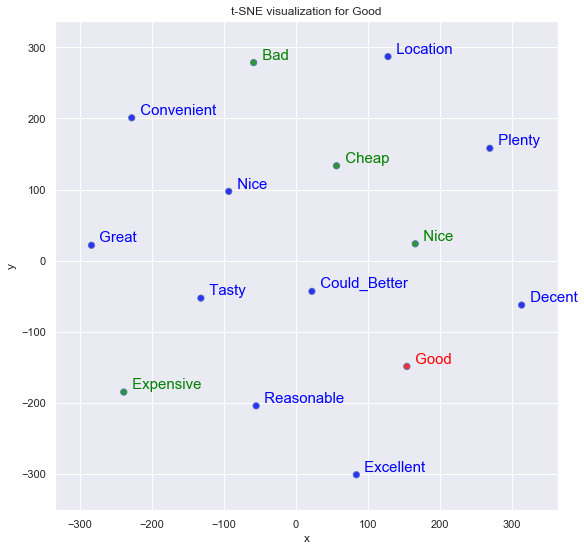

In [128]:
tsnescatterplot(w2v_model, 'good', ['bad', 'expensive', 'cheap', 'nice'])

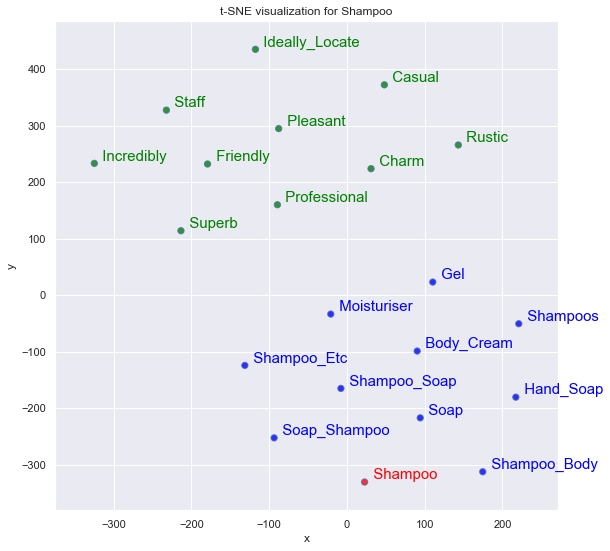

In [129]:
tsnescatterplot(w2v_model, 'shampoo', [i[0] for i in w2v_model.wv.most_similar(negative=["shampoo"])])
# Notare clusters.

In [23]:
import collections
word_freq = collections.defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

72584

In [24]:
import operator
sorted_with_freq = sorted(word_freq.items(),key=operator.itemgetter(1),reverse=True)
sorted_with_freq[:10]

[('room', 391960),
 ('staff', 236778),
 ('hotel', 210312),
 ('location', 204784),
 ('breakfast', 145619),
 ('good', 137900),
 ('negative', 130063),
 ('great', 115926),
 ('bed', 103130),
 ('friendly', 90280)]

In [132]:
v = sorted_with_freq[:10]
for word,freq in v:
    print(word)

room
staff
hotel
location
breakfast
good
negative
great
bed
friendly


C:\Users\Casa\Anaconda3\envs\ddd\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


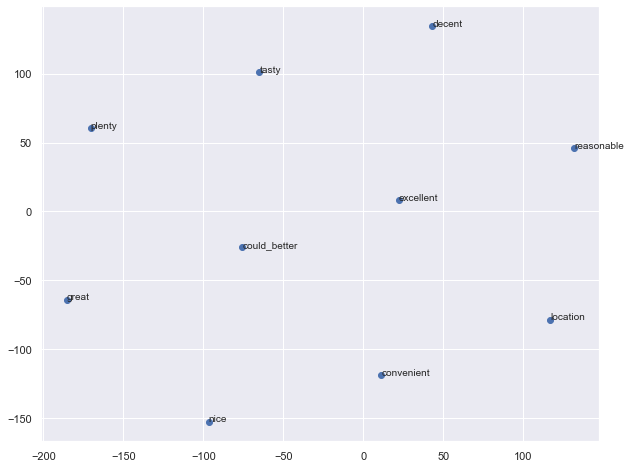

In [133]:
def plot_similar_words(word):
#     vocab = list(w2v_model.wv.vocab)
#     X = w2v_model[vocab]
    X = []
    vocabulary_local = []
    
    s = w2v_model.wv.most_similar(positive=[word])
    
    for word,freq in s:
        vec = w2v_model[word]
        X.append(vec)

        vocabulary_local.append(word)
        
    tsne = TSNE(n_components=2)
    X_tsne = tsne.fit_transform(X)
    df = pd.DataFrame(X_tsne, index=vocabulary_local, columns=['x', 'y'])
    fig = plt.figure(figsize=FIG_SIZE)
    ax = fig.add_subplot(1, 1, 1)

    ax.scatter(df['x'], df['y'])

    for word, pos in df.iterrows():
        ax.annotate(word, pos)
    plt.show()
plot_similar_words('good')

# Section 5: Learning Methods

In this section we apply different ML methods. First we focus on unsupervised ones, in particular K-means clustering that we apply 3 different times by using first the result of Bag-of-Words, then TF-IDF, finally Word2Vec. Then we switch to supervised methods for classification of reviews in positive/negative. We use Multinomial Bayes, Support Vector Machine and Random Forest with Bag-of-Words,TF-IDF and Word2Vec.

## Unsupervised Learning
In order to find the correct number of cluster to use in each different scenario we use the **elbow method**, this method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. We compute the clustering with value of k between 1 and 10 and each time we find the value of **WCSS** i.e. the within-cluster sum of squares.

In [49]:
# Method used to get randomly words in a specific cluster. 
import random

def pick_list_random_from_cluster(id_cluster, number, centroid):
    result = list()
    for i in range(1,number):
        result.append(random.choice(centroid[id_cluster]))
    return result

### K-means clustering with Bag-of-Words

Wall time: 58.4 s
Wall time: 3min 34s
Wall time: 4min 52s
Wall time: 8min 30s
Wall time: 8min 25s
Wall time: 9min 13s
Wall time: 10min 26s
Wall time: 11min 33s
Wall time: 13min 55s
Wall time: 13min 33s


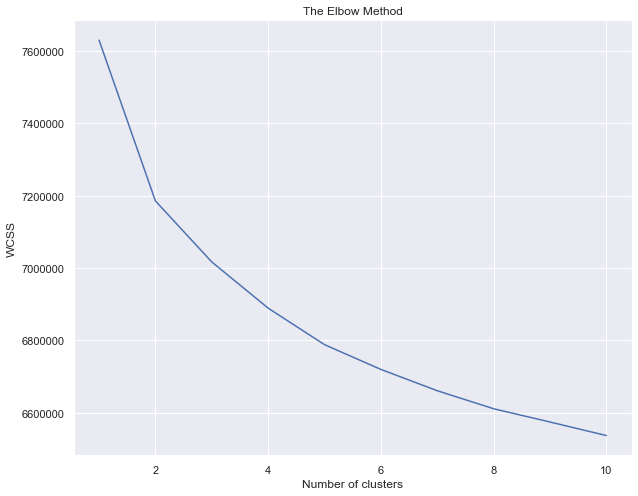

In [134]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    %time kmeans.fit(X_bow_svd)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=FIG_SIZE)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow_bow.png')
plt.show()

In [45]:
# From the pic above identify the number of clusters to use.
num_clust = 2
kmeans = KMeans(n_clusters=num_clust)
%time kmeans.fit(X_bow_svd)

CPU times: user 1min 25s, sys: 14.2 s, total: 1min 39s
Wall time: 1min 23s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
# Print centroid of each cluster.
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer_tfidf.get_feature_names()
for i in range(num_clust):
    print ("Cluster %d:" % i,)
    for ind in pick_list_random_from_cluster(i, 20, order_centroids):
        print (' %s' % terms[ind],)

Top terms per cluster:
Cluster 0:
 ajax
 alongside
 advertise
 advises
 afterall
 adjusting
 although
 ah
 accumulate
 afternoon
 aa
 aloft
 agin
 adequate
 absolutely
 abrasive
 alina
 adria
 accidentally
Cluster 1:
 accent
 adria
 advertised
 adults
 additional
 accidently
 allowance
 aldgate
 agree
 airbus
 abt
 allright
 amateur
 adam
 alll
 absurd
 aftershave
 added
 allow


### K-means clustering with TF-IDF

CPU times: user 47.4 s, sys: 8.56 s, total: 56 s
Wall time: 32.6 s
CPU times: user 2min 3s, sys: 19.1 s, total: 2min 22s
Wall time: 1min 57s
CPU times: user 3min 21s, sys: 23.1 s, total: 3min 44s
Wall time: 3min 3s
CPU times: user 6min 2s, sys: 25.1 s, total: 6min 27s
Wall time: 5min 29s
CPU times: user 7min 20s, sys: 26.5 s, total: 7min 47s
Wall time: 6min 2s


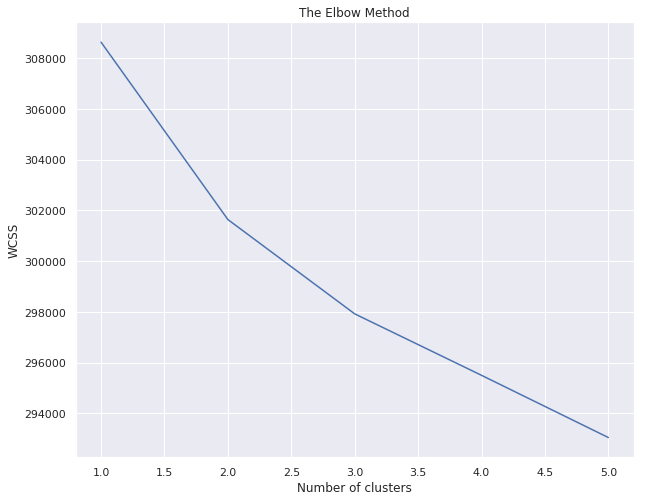

In [12]:
wcss = []
for i in range(1,6):
    kmeans = KMeans(n_clusters=i)
    %time kmeans.fit(X_tfidf_svd)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=FIG_SIZE)
plt.plot(range(1,6),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow_tfidf.png')
plt.show()

In [13]:
# From the pic above identify the number of clusters to use.
num_clust = 2
kmeans = KMeans(n_clusters=num_clust)
%time kmeans.fit(X_tfidf_svd)

CPU times: user 2min 17s, sys: 19.7 s, total: 2min 37s
Wall time: 2min 6s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
# Print centroid of each cluster.
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer_tfidf.get_feature_names()
for i in range(num_clust):
    print ("Cluster %d:" % i,)
    for ind in pick_list_random_from_cluster(i, 20, order_centroids):
        print (' %s' % terms[ind],)

Top terms per cluster:
Cluster 0:
 accordance
 ah
 access
 appartment
 agbar
 alan
 amendment
 alla
 agenda
 amneties
 anyhow
 alcoholic
 americano
 afraid
 accomplish
 advert
 abruptly
 actively
 anticipated
Cluster 1:
 announce
 achievement
 advanced
 accomodated
 aesthetic
 admire
 afterwards
 ali
 anxious
 action
 alfonso
 airconditioner
 alleyway
 amesterdam
 anti
 angry
 adaquate
 accomadating
 airplane


### K-means clustering with Word2Vec

CPU times: user 1.62 s, sys: 1.19 s, total: 2.82 s
Wall time: 745 ms
CPU times: user 3.98 s, sys: 2.61 s, total: 6.59 s
Wall time: 2.45 s
CPU times: user 4.58 s, sys: 2.81 s, total: 7.39 s
Wall time: 2.81 s
CPU times: user 5.74 s, sys: 3.07 s, total: 8.81 s
Wall time: 3.76 s
CPU times: user 5.83 s, sys: 3.27 s, total: 9.09 s
Wall time: 3.47 s
CPU times: user 7.05 s, sys: 3.62 s, total: 10.7 s
Wall time: 4.52 s
CPU times: user 8.24 s, sys: 3.72 s, total: 12 s
Wall time: 5.34 s
CPU times: user 8.45 s, sys: 4.04 s, total: 12.5 s
Wall time: 5.48 s
CPU times: user 9.25 s, sys: 4.5 s, total: 13.7 s
Wall time: 5.97 s
CPU times: user 9.75 s, sys: 4.58 s, total: 14.3 s
Wall time: 6.08 s


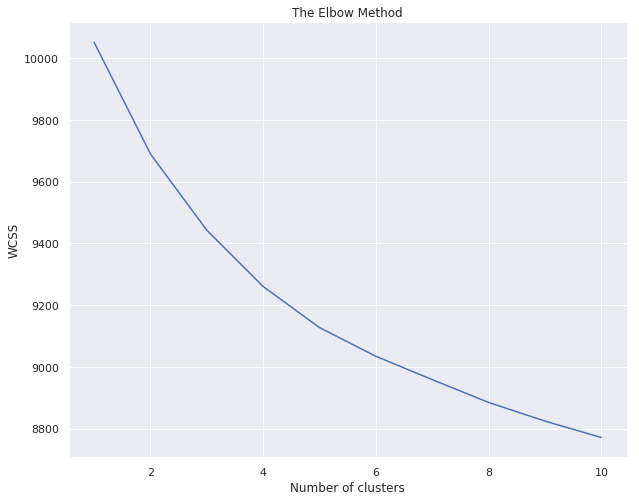

In [20]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    %time kmeans.fit(X_wv)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=FIG_SIZE)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow_word2vec.png')
plt.show()

In [47]:
# From the pic above identify the number of clusters to use.
num_clust = 4
kmeans = KMeans(n_clusters=num_clust)
%time kmeans.fit(X_wv)

CPU times: user 5.58 s, sys: 3.15 s, total: 8.72 s
Wall time: 3.48 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [48]:
# Print centroid of each cluster.
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer_tfidf.get_feature_names()
for i in range(num_clust):
    print ("Cluster %d:" % i,)
    for ind in pick_list_random_from_cluster(i, 20, order_centroids):
        print (' %s' % terms[ind],)

Top terms per cluster:
Cluster 0:
 adequate
 alain
 adjoin
 abit
 accessed
 accurate
 ability
 airco
 advertises
 absurdly
 adorable
 alan
 adopter
 absolutly
 abt
 allocate
 adults
 accommodate
 alexander
Cluster 1:
 ala
 admit
 absent
 aggressively
 accomadation
 alittle
 advisable
 agreement
 additional
 al
 addict
 alejandro
 accomodated
 accesible
 allocation
 airbus
 advanced
 abundance
 aitana
Cluster 2:
 abbey
 aa
 alittle
 aero
 adjustable
 advertisement
 airconditioner
 aero
 advises
 abut
 allocated
 aid
 addressed
 ability
 actual
 abuse
 adress
 admission
 airflow
Cluster 3:
 allergic
 accounting
 adequate
 affected
 aeroplane
 ab
 aircond
 agbar
 adjusted
 adored
 adored
 ab
 alexander
 afar
 accomodations
 alina
 agenda
 allowed
 aire


## Supervisioned Learning

In [17]:
X_train_counts_bow.shape

(515738, 11716)

In [18]:
X_bow_svd.shape

(515738, 300)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X_bow_svd, text_df['Is_Positive'], \
                                                    test_size=0.3, random_state=0)

In [20]:
text_df.head()

Text  Is_Positive  \
0  only the park outside of the hotel was beautif...            0   
1  no real complaints the hotel was great great l...            1   
2  location was good and staff were ok it is cute...            1   
3  great location in nice surroundings the bar an...            0   
4  amazing location and building romantic setting...            1   

                                          Clean_Text  
0  park outside hotel beautiful angry make post a...  
1  real complaint hotel great great location surr...  
2  location good staff ok cute hotel breakfast ra...  
3  great location nice surroundings bar restauran...  
4  amaze location building romantic setting book ...

In [21]:
len(x_train) + len(x_test) == len(y_train) + len(y_test)

True

In [22]:
X_train_counts_bow

<515738x11716 sparse matrix of type '<class 'numpy.int64'>'
	with 8551930 stored elements in Compressed Sparse Row format>

### Multinomial Naive Bayes with BoW

In [62]:
from sklearn.metrics import confusion_matrix

params = {
    'alpha':[x for x in range(0, 50, 10)]
} 

# Initialize Bayes Classifier.
nb = MultinomialNB()

# We need to tune the alpha parameter, in order to do this we use GridSearchCV.
clf = GridSearchCV(nb, param_grid=params,cv=2)

# N.B. We use X_train_counts_bow instead of the svd ones because TruncatedSVD has generated negative number that can't be used with Bayes.
x_train, x_test, y_train, y_test = train_test_split(X_train_counts_bow, text_df['Is_Positive'], \
                                                    test_size=0.3, random_state=0)
    
clf.fit(x_train, y_train)
print("Best param for alpha is {}".format(clf.best_params_))

Best param for alpha is {'alpha': 20}


In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred)))

[[  3043   6199]
 [  3592 141888]]
Accuracy score: 0.93672


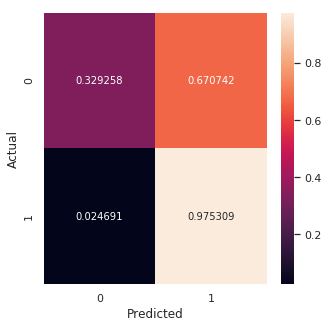

In [64]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = conf_mat / conf_mat.astype(np.float).sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### SVM with LSA on BoW

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X_bow_svd, text_df['Is_Positive'], \
                                                    test_size=0.3, random_state=0)

In [66]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred)))

[[  1422   7820]
 [   627 144853]]
Accuracy score: 0.94541


In [68]:
y_test.value_counts()

1    145480
0      9242
Name: Is_Positive, dtype: int64

In [69]:
pd.Series(y_pred).value_counts()

1    152673
0      2049
dtype: int64

In [70]:
text_df['Is_Positive'].value_counts()

1    485035
0     30703
Name: Is_Positive, dtype: int64

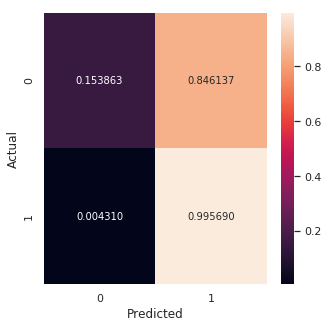

In [71]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = conf_mat / conf_mat.astype(np.float).sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Forest Classifier with BoW

In [72]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [73]:
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred)))

[[  1045   8197]
 [  1679 143801]]
Accuracy score: 0.93617


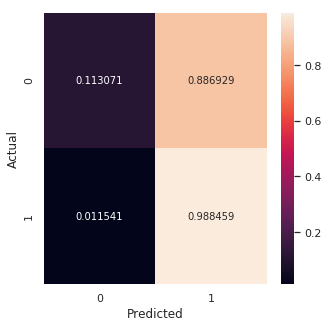

In [74]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = conf_mat / conf_mat.astype(np.float).sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Supervised Learning based on TF-IDF

In [85]:
X_train_counts_tfidf.shape

(515738, 11716)

In [86]:
X_tfidf_svd.shape

(515738, 600)

In [87]:
x_train, x_test, y_train, y_test = train_test_split(X_tfidf_svd, text_df['Is_Positive'], \
                                                    test_size=0.3, random_state=0)

In [88]:
text_df.head()

Text  Is_Positive  \
0  only the park outside of the hotel was beautif...            0   
1  no real complaints the hotel was great great l...            1   
2  location was good and staff were ok it is cute...            1   
3  great location in nice surroundings the bar an...            0   
4  amazing location and building romantic setting...            1   

                                          Clean_Text  
0  park outside hotel beautiful angry make post a...  
1  real complaint hotel great great location surr...  
2  location good staff ok cute hotel breakfast ra...  
3  great location nice surroundings bar restauran...  
4  amaze location building romantic setting book ...

In [89]:
len(x_train) + len(x_test) == len(y_train) + len(y_test)

True

In [90]:
X_train_counts_tfidf

<515738x11716 sparse matrix of type '<class 'numpy.float64'>'
	with 8551930 stored elements in Compressed Sparse Row format>

### Multinomial Naive Bayes with TF-IDF

In [104]:
from sklearn.metrics import confusion_matrix

params = {
    'alpha':[x for x in range(0, 50, 10)]
} 

# Initialize Bayes Classifier.
nb = MultinomialNB()

# We need to tune the alpha parameter, in order to do this we use GridSearchCV.
clf = GridSearchCV(nb, param_grid=params,cv=2)

# Uso X_train_counts_bow perchè svd ha valori negativi.
x_train, x_test, y_train, y_test = train_test_split(X_train_counts_tfidf, text_df['Is_Positive'], \
                                                    test_size=0.3, random_state=0)
    
clf.fit(x_train, y_train)
print("Best param for alpha is {}".format(clf.best_params_))

Best param for alpha is {'alpha': 0}


In [105]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred)))

[[   964   8278]
 [   510 144970]]
Accuracy score: 0.94320


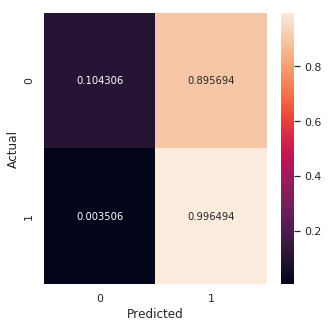

In [106]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = conf_mat / conf_mat.astype(np.float).sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### SVM with LSA on TF-IDF

In [107]:
x_train, x_test, y_train, y_test = train_test_split(X_tfidf_svd, text_df['Is_Positive'], \
                                                    test_size=0.3, random_state=0)

In [108]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [109]:
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred)))

[[  1153   8089]
 [   460 145020]]
Accuracy score: 0.94475


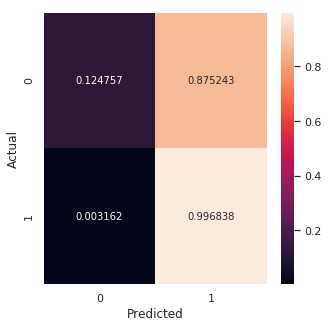

In [110]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = conf_mat / conf_mat.astype(np.float).sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Forest Classifier with TF-IDF

In [111]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [112]:
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred)))

[[   678   8564]
 [   858 144622]]
Accuracy score: 0.93910


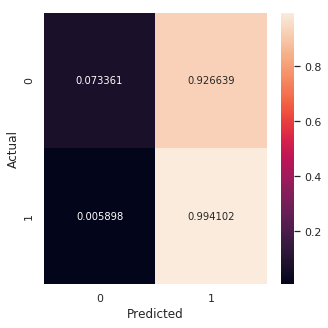

In [113]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = conf_mat / conf_mat.astype(np.float).sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Supervised Learning based on Word2Vec

In [24]:
len(sentences)

515738

In [25]:
def sentence_vectors(model, sentences):
    #Collecting words that are known to the model    
    model_voc = set(model.wv.vocab.keys()) 
    
    X = []
    
    for sentence in sentences:
                
        # Empty array of zeros.
        sent_vector = np.zeros(model.vector_size, dtype="float32")

        # Use a counter variable for number of words in a text
        nwords = 0
        
        # Sum up all words vectors that are know to the model
        for word in sentence:
            if word in model_voc: 
                sent_vector += model[word]
                nwords += 1.

        # Now get the average
        if nwords > 0:
            sent_vector /= nwords
        X.append(sent_vector)
    return X

X_vw = sentence_vectors(w2v_model, sentences)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [26]:
X_vw

[array([ 1.42856613e-02, -2.24815831e-02,  2.27612536e-02,  7.97091983e-03,
        -6.80920016e-03, -2.76382361e-02,  1.72476675e-02, -5.38216066e-03,
         3.64947948e-03,  1.50881810e-02,  3.80768185e-03, -1.79325859e-03,
        -1.73922954e-03,  4.31991555e-03,  1.51465833e-02,  2.46687070e-03,
         1.01023829e-02, -1.20952504e-03,  2.52005886e-02, -1.42166615e-02,
        -1.27726970e-02, -2.07030121e-02, -6.22966187e-03, -2.99665630e-02,
         1.74443889e-03, -2.80913577e-04,  3.95725667e-03, -2.07006633e-02,
        -8.70145671e-03,  3.58211696e-02,  5.19906916e-03, -2.10044682e-02,
        -2.55172700e-02,  2.12521153e-03, -2.64402591e-02,  1.04524828e-02,
         1.24964658e-02,  1.32241752e-02,  8.63584864e-04, -5.17266383e-03,
        -9.81527148e-04,  1.89364087e-02, -3.63818705e-02, -1.43992873e-02,
        -2.46991031e-02,  7.69851403e-03,  1.29297944e-02,  1.53778074e-02,
        -8.54314584e-03, -1.50125846e-03,  8.36154446e-03,  5.19206049e-03,
         3.5

### SVM with Word2Vec

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X_vw, text_df['Is_Positive'], \
                                                    test_size=0.3, random_state=0)

In [76]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred)))

[[   653   8589]
 [   388 145092]]
Accuracy score: 0.94198


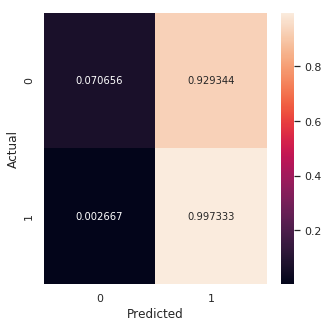

In [78]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = conf_mat / conf_mat.astype(np.float).sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Random Forest with Word2Vec

In [79]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [80]:
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred)))

[[  1842   7400]
 [  1944 143536]]
Accuracy score: 0.93961


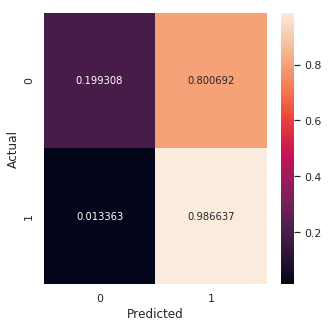

In [81]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = conf_mat / conf_mat.astype(np.float).sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Comparison of supervised algorithm accuracy

| **NLP Method** 	| **Supervised Method**   	| **Accuracy Score** 	|
|----------------	|-------------------------	|--------------------	|
| BoW            	| Multinomial Naive Bayes 	| 0.93672            	|
| BoW            	| SVM                     	| 0.94541              	|
| Bow            	| Forest Classifier       	| 0.93617              	|
| TF-IDF         	| Multinomial Naive Bayes 	| 0.94320              	|
| TF-IDF         	| SVM                     	| 0.94475              	|
| TF-IDF         	| Forest Classifier       	| 0.93910              	|
| Word2Vec       	| SVM                     	| 0.94198              	|
| Word2Vec       	| Forest Classifier       	| 0.93961            	|

# Section 6: Recommendation system based on tags

In [34]:
# Copy the dataframe to work on recommendation.
tags_recom = text_df.copy()
tags_recom.head()

Text  Is_Positive  \
0  only the park outside of the hotel was beautif...            0   
1  no real complaints the hotel was great great l...            1   
2  location was good and staff were ok it is cute...            1   
3  great location in nice surroundings the bar an...            0   
4  amazing location and building romantic setting...            1   

                                          Clean_Text  
0  park outside hotel beautiful angry make post a...  
1  real complaint hotel great great location surr...  
2  location good staff ok cute hotel breakfast ra...  
3  great location nice surroundings bar restauran...  
4  amaze location building romantic setting book ...

In [37]:
tags_recom['Tags'] = reviews_df['Tags']
tags_recom['Hotel_Name'] = reviews_df['Hotel_Name']
tags_recom.head()

Text  Is_Positive  \
0  only the park outside of the hotel was beautif...            0   
1  no real complaints the hotel was great great l...            1   
2  location was good and staff were ok it is cute...            1   
3  great location in nice surroundings the bar an...            0   
4  amazing location and building romantic setting...            1   

                                          Clean_Text  \
0  park outside hotel beautiful angry make post a...   
1  real complaint hotel great great location surr...   
2  location good staff ok cute hotel breakfast ra...   
3  great location nice surroundings bar restauran...   
4  amaze location building romantic setting book ...   

                                                Tags   Hotel_Name  
0  [' Leisure trip ', ' Couple ', ' Duplex Double...  Hotel Arena  
1  [' Leisure trip ', ' Couple ', ' Duplex Double...  Hotel Arena  
2  [' Leisure trip ', ' Family with young childre...  Hotel Arena  
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...  Hotel Arena  
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...  Hotel Arena

In [38]:
# Count how many times each hotel, grouped by name, has been used for a leisure trip.
hotelLeisureCounts = tags_recom[tags_recom['Tags'].str.contains('Leisure')].groupby('Hotel_Name')['Hotel_Name'].count().sort_values(ascending=False)
print ("LeisureCounts: ", len(hotelLeisureCounts))
# Count how many times each hotel, grouped by name, has been used for a business trip.
hotelBusinessCounts = tags_recom[tags_recom['Tags'].str.contains('Business')].groupby('Hotel_Name')['Hotel_Name'].count().sort_values(ascending=False)
print ("Business Counts: ",len(hotelBusinessCounts))
# Count how many times each hotel, grouped by name, has been used for a solitare trip.
hotelSoloCounts = tags_recom[tags_recom['Tags'].str.contains('Solo')].groupby('Hotel_Name')['Hotel_Name'].count().sort_values(ascending=False)
print ("Solo Traveller Counts: ",len(hotelSoloCounts))
# Count how many times each hotel, grouped by name, has been used for a trip that involved a couple.
hotelCoupleCounts = tags_recom[tags_recom['Tags'].str.contains('Couple')].groupby('Hotel_Name')['Hotel_Name'].count().sort_values(ascending=False)
print ("Solo Couple Counts: ",len(hotelCoupleCounts))
# Count how many times each hotel, grouped by name, has been used for a trip that involved a group.
hotelGroupCounts = tags_recom[tags_recom['Tags'].str.contains('Group')].groupby('Hotel_Name')['Hotel_Name'].count().sort_values(ascending=False)
print ("Solo Group Counts: ",len(hotelGroupCounts))

LeisureCounts:  1492
Business Counts:  1488
Solo Traveller Counts:  1491
Solo Couple Counts:  1492
Solo Group Counts:  1481


In [39]:
# Create a dataframe in which the names of the hotels are the index.
tags_recom = pd.DataFrame(index = tags_recom['Hotel_Name'].unique().tolist())
tags_recom.head()

Empty DataFrame
Columns: []
Index: [Hotel Arena, K K Hotel George, Apex Temple Court Hotel, The Park Grand London Paddington, Monhotel Lounge SPA]

In [40]:
# Add the column for each type of trip.
tags_recom['Business']=0;
tags_recom['Leisure']=0;
tags_recom['Solo']=0;
tags_recom['Couple']=0;
tags_recom['Group']=0;
tags_recom.head()

Business  Leisure  Solo  Couple  Group
Hotel Arena                              0        0     0       0      0
K K Hotel George                         0        0     0       0      0
Apex Temple Court Hotel                  0        0     0       0      0
The Park Grand London Paddington         0        0     0       0      0
Monhotel Lounge SPA                      0        0     0       0      0

In [41]:
# Sets the value of each attribute based on the occurences of them.
for hotel in reviews_df['Hotel_Name'].unique().tolist():
    # The following ifs take care of distinguish each hotel as business or leisure
    if hotel in hotelBusinessCounts and hotel in hotelLeisureCounts:
        if hotelLeisureCounts[hotel] > hotelBusinessCounts[hotel]:
            tags_recom.at[hotel, 'Leisure'] = 1
        elif hotelLeisureCounts[hotel] < hotelBusinessCounts[hotel]:
            tags_recom.at[hotel, 'Business'] = 1
        else:
            tags_recom.at[hotel, 'Leisure'] = 1
            tags_recom.at[hotel, 'Business'] = 1
    elif hotel in hotelBusinessCounts and hotel not in hotelLeisureCounts:
        tags_recom.at[hotel, 'Business'] = 1
    elif hotel in hotelLeisureCounts and hotel not in hotelBusinessCounts:
        tags_recom.at[hotel, 'Leisure'] = 1
        
   # Instead these ifs set each hotel as more suited for solo travellers, couples or groups.
    if hotel in hotelSoloCounts and hotel in hotelCoupleCounts and hotel in hotelGroupCounts:
        soloCount=hotelSoloCounts[hotel]
        coupleCount=hotelCoupleCounts[hotel]
        groupCount=hotelGroupCounts[hotel]

        if soloCount>coupleCount and soloCount>groupCount:
            tags_recom.at[hotel, 'Solo'] = 1
        elif coupleCount>soloCount and coupleCount>groupCount:
            tags_recom.at[hotel, 'Couple'] = 1
        elif groupCount>soloCount and groupCount>coupleCount:
            tags_recom.at[hotel, 'Group'] = 1
        elif soloCount==coupleCount and soloCount>groupCount:
            tags_recom.at[hotel, 'Solo'] = 1
            tags_recom.at[hotel, 'Couple'] = 1
        elif soloCount==groupCount and soloCount>coupleCount:
            tags_recom.at[hotel, 'Solo'] = 1
            tags_recom.at[hotel, 'Group'] = 1
        elif coupleCount==groupCount and coupleCount>soloCount:
            tags_recom.at[hotel, 'Couple'] = 1
            tags_recom.at[hotel, 'Group'] = 1
        else:
            tags_recom.at[hotel, 'Solo'] = 1
            tags_recom.at[hotel, 'Couple'] = 1
            tags_recom.at[hotel, 'Group'] = 1
    
tags_recom

Business  Leisure  Solo  Couple  \
Hotel Arena                                          0        1     0       1   
K K Hotel George                                     0        1     0       1   
Apex Temple Court Hotel                              0        1     0       1   
The Park Grand London Paddington                     0        1     0       1   
Monhotel Lounge SPA                                  0        1     0       1   
Kube Hotel Ice Bar                                   0        1     0       1   
The Principal London                                 0        1     0       1   
Park Plaza County Hall London                        0        1     0       1   
One Aldwych                                          0        1     0       1   
Splendid Etoile                                      0        1     0       1   
Hotel Trianon Rive Gauche                            0        1     0       1   
InterContinental London Park Lane                    0        1     0       1   
Novotel Suites Paris Nord 18 me                      0        1     0       1   
Grand Royale London Hyde Park                        0        1     0       1   
Milestone Hotel Kensington                           0        1     0       1   
Crowne Plaza London Kings Cross                      0        1     0       1   
Select Hotel                                         0        1     0       1   
H tel De Vend me                                     0        1     0       1   
Pullman Paris Centre Bercy                           0        1     0       1   
Gardette Park Hotel                                  0        1     0       1   
Hotel Panache                                        0        1     0       1   
H tel des Ducs D Anjou                               0        1     1       0   
Hotel Scribe Paris Opera by Sofitel                  0        1     0       1   
Novotel London West                                  0        1     0       1   
Haymarket Hotel                                      0        1     0       1   
Intercontinental London The O2                       0        1     0       1   
H tel Juliana Paris                                  0        1     0       1   
Hotel L Antoine                                      0        1     0       1   
Belfast                                              0        1     1       0   
Shangri La Hotel Paris                               0        1     0       1   
...                                                ...      ...   ...     ...   
Acevi Villarroel                                     0        1     0       1   
Hotel Arkadenhof                                     1        0     1       0   
Hotel Vondel Amsterdam                               0        1     0       1   
Hotel Pension Baron am Schottentor                   0        1     0       1   
Hotel Atlanta                                        0        1     0       1   
Park Inn by Radisson Uno City Vienna                 0        1     0       1   
NH Danube City                                       1        0     1       0   
Strandhotel Alte Donau                               1        0     0       1   
ARCOTEL Kaiserwasser Superior                        0        1     1       0   
Mercure Hotel Raphael Wien                           0        1     0       1   
Arthotel ANA Boutique Six                            0        1     0       1   
Austria Trend Hotel Anatol Wien                      0        1     0       1   
Hotel Kaiserin Elisabeth                             0        1     0       1   
Boutique Hotel Notting Hill                          0        1     0       1   
Crowne Plaza London Ealing                           0        1     0       1   
Good Hotel London                                    0        1     0       1   
Park Plaza Westminster Bridge London                 0        1     0       1   
Hotel du Vin Cannizaro House Wimbledon               0        1     0       1

In [42]:
# We introduce the cosine_similarity in order to measure the cosine between the user vector and the vectors
# of the tags in the df. Clearly, the more two vectors tend to have the same direction, the more the cosine similarity
# value is near to 1
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
# Here we set a dataframe in which the user sets the a filter on the tags he / she is interested in
userDF= pd.DataFrame(index=['user'],columns=['Business','Leisure','Solo','Couple','Group'])
userDF.loc['user'] = [0,1,0,1,0]
userDF

Business  Leisure  Solo  Couple  Group
user         0        1     0       1      0

In [43]:
similarityDF=cosine_similarity(tags_recom,userDF)
similarityDF = pd.DataFrame(similarityDF)
# Update similarity dataframe to add the average score column
similarityDF['Average_Score']=0.0;

for index, row in similarityDF.iterrows():
    # Get the hotel row from original dataframe
    hotelRow= reviews_df.loc[reviews_df['Hotel_Name'] == tags_recom.index[index]].head(1)
    # Update score column
    similarityDF.at[index, 'Average_Score'] = hotelRow['Average_Score']

# Sort similarityDF by cosine similarity score and then hotel average score
similarityDF=similarityDF.sort_values(by=[0,'Average_Score'],ascending=False).head(5)
for index, row in similarityDF.iterrows():
    print ("Hotel Name: ", tags_recom.index[index])
    hotelRow= reviews_df.loc[reviews_df['Hotel_Name'] == tags_recom.index[index]].head(1)
    print ("Average Score: ", hotelRow['Average_Score'])
    print (tags_recom.iloc[index])
    print ('Similarity score',row[0])
    print ('\n')


Hotel Name:  Haymarket Hotel
Average Score:  14708    9.6
Name: Average_Score, dtype: float64
Business    0
Leisure     1
Solo        0
Couple      1
Group       0
Name: Haymarket Hotel, dtype: int64
Similarity score 0.9999999999999998


Hotel Name:  H tel de La Tamise Esprit de France
Average Score:  176997    9.6
Name: Average_Score, dtype: float64
Business    0
Leisure     1
Solo        0
Couple      1
Group       0
Name: H tel de La Tamise Esprit de France, dtype: int64
Similarity score 0.9999999999999998


Hotel Name:  41
Average Score:  185602    9.6
Name: Average_Score, dtype: float64
Business    0
Leisure     1
Solo        0
Couple      1
Group       0
Name: 41, dtype: int64
Similarity score 0.9999999999999998


Hotel Name:  Hotel Casa Camper
Average Score:  316447    9.6
Name: Average_Score, dtype: float64
Business    0
Leisure     1
Solo        0
Couple      1
Group       0
Name: Hotel Casa Camper, dtype: int64
Similarity score 0.9999999999999998


Hotel Name:  Hotel The Serr

# Section 7: Sentiment Analysis

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Casa\AppData\Roaming\nltk_data...


True

In [200]:
sid = SentimentIntensityAnalyzer()
text_df['Neg'] = 0.0
text_df['Neu'] = 0.0
text_df['Pos'] = 0.0
text_df['Comp'] = 0.0

for index, row in text_df.iterrows():
    result = sid.polarity_scores(row['Clean_Text'])
    text_df.at[index,'Neg'] = result['neg']
    text_df.at[index,'Neu'] = result['neu']
    text_df.at[index,'Pos'] = result['pos']
    text_df.at[index,'Comp'] = result['compound']

In [217]:
text_df.head()

Text  Is_Positive  \
0  only the park outside of the hotel was beautif...            0   
1  no real complaints the hotel was great great l...            1   
2  location was good and staff were ok it is cute...            1   
3  great location in nice surroundings the bar an...            0   
4  amazing location and building romantic setting...            1   

                                          Clean_Text    Neg    Neu    Pos  \
0  park outside hotel beautiful angry make post a...  0.114  0.780  0.105   
1  real complaint hotel great great location surr...  0.136  0.591  0.273   
2  location good staff ok cute hotel breakfast ra...  0.098  0.591  0.311   
3  great location nice surroundings bar restauran...  0.204  0.572  0.224   
4  amaze location building romantic setting book ...  0.082  0.711  0.206   

     Comp  
0  0.0609  
1  0.9325  
2  0.8555  
3  0.5121  
4  0.8979